# KNN o k vecinos más cercanos

kNN, o k-Nearest Neighbors, es un algoritmo supervizado de clasificación y regresion. Sin embargo, difiere de los clasificadores descritos anteriormente porque es un modelo de aprendizaje perezoso.

¿Qué es un modelo de aprendizaje perezoso? 

Un modelo de aprendizaje perezoso no hace mucho durante el proceso de capacitación más que almacenar los datos de la capacitación. Sólo cuando se introducen nuevos datos sin etiquetar, este tipo de modelo busca clasificar.

Por otro lado, un modelo aprendizaje activo construye un modelo de clasificación durante la capacitación. Cuando se introducen nuevos datos no etiquetados, este tipo de modelo introduce los datos en el modelo de clasificación.

Aprendizaje perezoso: en realidad el algoritmo solo se ejecuta en el momento que se requiere predecir una nueva instancia a partir de una predicción local. Este algoritmo no aprende una función discriminatoria de los datos de entrenamiento, sino que memoriza el conjunto de datos de entrenamiento.

Entonces, ¿qué hace KNN?<br>
kNN no construye ningún modelo de clasificación de este tipo. En su lugar, sólo almacena los datos de formación etiquetados.


El algoritmo KNN en sí mismo es bastante sencillo y se puede resumir en los siguientes pasos:<br>

- Elija el número de k y una métrica de distancia.
- Encuentra los vecinos más cercanos de la muestra que queremos clasificar.
- Asigne la etiqueta de clase por mayoría de votos.

Algunas caracteristicas de KNN
- Sencillo: asignar la clase o valor agregado de las instancias conocidas que se encuentran mas cerca de la instancia a predecir, 
- Basado en las instancias de aprendizaje, 
- No en un modelo subyacente probabilístico/estadístico


Cuando llegan nuevos datos sin etiquetar, kNN funciona en dos pasos básicos:
En primer lugar, examina los k puntos de datos de entrenamiento más cercanos, es decir, los vecinos más cercanos.
Segundo, usando las clases de los vecinos, kNN obtiene una mejor idea de cómo se deben clasificar los nuevos datos.


En la siguiente figura ilustra como un nuevo punto de datos(?) se le asigna la etiqueta de la clase triangulo basado en la votacion de sus cinco vecinos mas cercanos:

![knn](img/knn.png)

¿Cómo se da cuenta kNN de lo que está más cerca? <br>
Para los datos continuos, kNN utiliza una métrica de distancia como la distancia euclídea. La elección de la métrica de distancia depende en gran medida de los datos. Algunos incluso sugieren aprender una métrica de distancia basada en los datos de la capacitación. Hay muchos más detalles y documentos sobre las métricas de distancia kNN.


Uso de la distancia de Hamming como métrica para la "cercanía" de dos cadenas de texto.

Depende de la definición de una función de distancia, que se escogerá según la cantidad y características de las variables independientes


Transformación de datos discretos en características binarias.


¿Cómo clasifica kNN los nuevos datos cuando los vecinos no están de acuerdo? 
kNN tiene un tiempo fácil cuando todos los vecinos son de la misma clase. La intuición es que si todos los vecinos están de acuerdo, entonces el nuevo punto de datos probablemente caiga en la misma clase.


¿Cómo decide kNN la clase cuando los vecinos no tienen la misma clase?

2 técnicas comunes para tratar con esto son:<br>

Tomar una mayoría simple de votos de los vecinos. Cualquier clase que tenga el mayor número de votos se convierte en la clase para el nuevo punto de datos.
Tomar un voto similar, excepto dar un peso mayor a los vecinos que están más cerca. Una manera sencilla de hacer esto es usar la distancia recíproca, por ejemplo, si el vecino está a 5 unidades de distancia, entonces pondere su voto 1/5. A medida que el vecino se aleja, la distancia recíproca se hace cada vez más pequeña.... ¡exactamente lo que queremos!


¿Por qué usar kNN? 
La facilidad de comprensión e implementación son dos de las razones clave para usar kNN. Dependiendo de la métrica de distancia, el kNN puede ser bastante preciso.


Aquí hay 5 cosas a las que hay que prestar atención:

kNN puede resultar muy costoso desde el punto de vista computacional cuando se trata de determinar los vecinos más cercanos en un conjunto de datos de gran tamaño.<br>
Los datos ruidosos pueden desviar las clasificaciones kNN.<br>
Las características con un rango mayor de valores pueden dominar la métrica de distancia en relación con las características que tienen un rango menor, por lo que el escalado de características es importante.<br>
Dado que el procesamiento de datos es diferido, el kNN generalmente requiere mayores requerimientos de almacenamiento que los clasificadores ansiosos.<br>
La selección de una buena métrica de distancia es crucial para la precisión del kNN.<br>


Que significa el parámetro K

Número de vecinos mas cercanos a considerar para establecer la clase o valor de una nueva instancia


Consideraciones a tener en cuenta con el parámetro K:


K controla el overfitting(sobre aprendizaje) y el underfitting(sub aprendizaje
•Modelos más sencillos (K mas grandes) previenen el overfitting, pero pueden por el contrario irse hacia el underfitting
•Modelos mas complejos (K mas pequeños) previenen el underfitting, pero pueden por el contrario irse hacia el overfitting
•El K ideal que sirva para todos los casos no existe, depende de cada datasetespecífico


Las mismas consideraciones aplican tanto para la clasificación como para la regresión a partir de KNN (encontrar el K ideal para prevenir el over/underfitting)<br>
Ejemplo: puntos en rojo resultado de una función lineal con ruido (lo que se quiere aprender)<vr>
- 2 modelos KNN en azul (izquierda y derecha)
- 3 modelo lineal ideal en negro
- ¿En cuál de los dos modelos KNN hay overfitting)?


![overfiting](img/overfiting.png)

In [1]:
from sklearn.datasets import load_iris

# Creando el dataset iris
iris = load_iris()
X = iris.data
y = iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# importando KNN 
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [19]:
knnr = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state =1)

In [22]:
knnr.fit(x_train, y_train) # Ajustando el modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [23]:
# Verificando el error medio del modelo
print("El error medio del modelo es: {:.2f}".format(np.power(y - knnr.predict(X),2).mean()))


El error medio del modelo es: 0.00


In [24]:
pred = knnr.predict(x_test)

In [25]:
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
print('Accuracy: %.2f' % accuracy_score(y_test, pred))

Accuracy: 1.00


In [30]:
print(confusion_matrix(y_test, pred))

[[5 0 0]
 [0 6 0]
 [0 0 4]]


Elegir el K

Elegir correctamente el K es crucial para el balance entre sobre ajuste o sub ajuste del modelo, a continuacion se muestra como puede estimarse este valor:

In [28]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

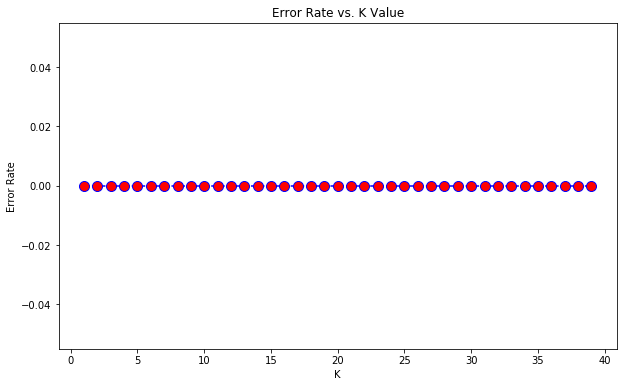

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Ventajas de KNN

- Enfoque basado en la memoria es que el clasificador se adapta inmediatamente a medida que recopilamos nuevos datos de entrenamiento

Desventajas

- la complejidad computacional para clasificar nuevas muestras crece linealmente con el número de muestras en el conjunto de datos de capacitación
- Muy sensible a sobre ajuste debido a la maldicion de la dimensionalidad(La maldición de la dimensionalidad describe el fenómeno en el que el espacio de la característica se vuelve cada vez más escaso para un número creciente de dimensiones de un conjunto de datos de formación de tamaño fijo)